<a href="https://colab.research.google.com/github/Charlez42/proyecto-final-hc-carlos-fuentes/blob/main/PIEZAS_CERAMICAS_MUSEO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Replace data.csv with your own file name
original_df = pd.read_csv('/content/drive/MyDrive/HACIENDO_CIENCIA_COLAB/PIEZAS_CERAMICAS_MUSEO.csv')

In [5]:
print(original_df.columns)

Index(['id', 'Código', 'Fecha de Procedencia', 'Tipo de bien',
       'Tipo de Material', 'Proveniencia', 'Sector', 'Cuadrante', 'Área', 'UE',
       'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Coordenadas',
       'Tipo de Contexto', 'Denominación de Contexto', 'Fecha de excavación',
       'Excavador', 'Contexto', 'Códigos Previos', 'Código Registro Nacional',
       'Nro Ingreso', 'Tipo de Objeto', 'Cultura', 'Periodo',
       'Técnica de Manufactura', 'Técnica de Decoración', 'Descripción',
       'Descripción Decoración', 'Alto', 'Largo', 'Ancho', 'Espesor',
       'Diámetro máximo', 'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala',
       'Vitrina', 'Depósito', 'Estante', 'Balda', 'Nro Caja',
       'Observación Final', 'Estado de Integridad', 'Estado de Conservación',
       'Inventariador', 'Fecha de Inventario', 'Catalogador Previo',
       'Fecha Catalogador Previo', 'Revisado'],
      dtype='object')


In [18]:
columns_less_important = ['id', 'Fecha de Procedencia', 'Tipo de bien', 'Cuadrante', 'Área', 'UE',
      'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Tipo de Contexto', 'Códigos Previos',
      'Contexto', 'Código Registro Nacional', 'Nro Ingreso', 'Observación Final',
      'Catalogador Previo','Fecha Catalogador Previo', 'Revisado']

LIMPIEZA DE DATOS

In [19]:
#Este codigo remueve del dataframe las columnas previamente declaradas como menos importantes
df = original_df.drop(columns=columns_less_important)
print(df.head())

            Código Tipo de Material       Proveniencia         Sector  \
0  EBBCE00000-1152         Cerámica    Huaca Cao Viejo  Frontis Norte   
1  EBBCE00000-1151         Cerámica  Complejo El Brujo            NaN   
2  EBBCE00000-1150         Cerámica    Sector Colonial        Iglesia   
3  EBBCE00000-1149         Cerámica    Sector Colonial        Iglesia   
4  EBBCE00000-1148         Cerámica    Sector Colonial        Iglesia   

               Coordenadas Denominación de Contexto Fecha de excavación  \
0          S:66.27 E:85.25              Entierro 60          1992-07-18   
1                      NaN                      NaN                 NaN   
2  Y:179-180 R:350.7-365.7   Entierro disturbado 01          2012-07-07   
3  Y:179-180 R:350.7-365.7   Entierro disturbado 01          2012-07-07   
4  Y:179-180 R:350.7-365.7   Entierro disturbado 01          2012-07-07   

  Excavador Tipo de Objeto     Cultura  ... Sala Vitrina Depósito Estante  \
0   JPG/JMG      Miniatura  Lamba

In [20]:
#mostrando las columnas de ahora:
print(df.columns)

Index(['Código', 'Tipo de Material', 'Proveniencia', 'Sector', 'Coordenadas',
       'Denominación de Contexto', 'Fecha de excavación', 'Excavador',
       'Tipo de Objeto', 'Cultura', 'Periodo', 'Técnica de Manufactura',
       'Técnica de Decoración', 'Descripción', 'Descripción Decoración',
       'Alto', 'Largo', 'Ancho', 'Espesor', 'Diámetro máximo',
       'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala', 'Vitrina',
       'Depósito', 'Estante', 'Balda', 'Nro Caja', 'Estado de Integridad',
       'Estado de Conservación', 'Inventariador', 'Fecha de Inventario'],
      dtype='object')


In [21]:
#aca asignaremos la palabra desconocido a todos las celdas vacias para la columna 'Proveniencia'
#si es que aplica
df['Proveniencia'] = df['Proveniencia'].fillna('desconocido')

In [34]:
#Haremos un conteo de cuantas piezas hay de cada tipo
piezas_por_origen = df['Proveniencia'].value_counts()
print(piezas_por_origen)

Proveniencia
Huaca Cao Viejo      1035
Huaca Cortada          37
desconocido            28
Sector Colonial        22
Complejo El Brujo      21
Paredones              11
Pozo 2                  9
Pozo 1                  8
Montículo I             3
Montículo II            1
Otros                   1
Name: count, dtype: int64


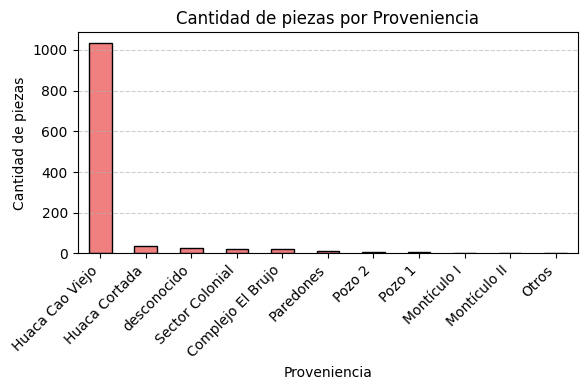

In [37]:
import matplotlib.pyplot as plt

# Crea la gráfica
plt.figure(figsize=(6, 4))
piezas_por_origen.plot(kind='bar', color='lightcoral', edgecolor='black')

# Estilo de la gráfica
plt.title('Cantidad de piezas por Proveniencia')
plt.xlabel('Proveniencia')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [71]:
#Haremos un conteo de cuantas piezas hay de cada tipo, pero según la fecha de excavación
piezas_por_origen = df['Fecha de excavación'].value_counts()
print(piezas_por_origen)

Fecha de excavación
1994-07-01    60
1998-05-27    32
1996-09-01    26
1995-05-31    21
1992-07-18    17
              ..
2012-01-11     1
1993-10-07     1
1991-05-24     1
2013-03-21     1
2001-03-02     1
Name: count, Length: 422, dtype: int64


In [70]:
# Cambiaremos la fecha para que solo se rastree con el año
# Aseguramos que la columna sea tipo fecha
df['Fecha de excavación'] = pd.to_datetime(df['Fecha de excavación'], errors='coerce')

In [27]:
# Extraemos el año de la fecha
df['Año de excavación'] = df['Fecha de excavación'].dt.year

In [28]:
# Contamos cuántas piezas hay por año
piezas_por_año = df['Año de excavación'].value_counts().sort_index()

In [64]:
print(piezas_por_año)

Año de excavación
1990.0      3
1991.0    124
1992.0    314
1993.0    152
1994.0    101
1995.0     88
1996.0     65
1997.0     45
1998.0     72
1999.0      2
2000.0      1
2001.0     23
2002.0     13
2003.0      3
2004.0      7
2005.0     42
2006.0      6
2007.0      6
2008.0     13
2009.0      1
2010.0      3
2011.0      4
2012.0     13
2013.0      3
2020.0     23
2021.0      1
Name: count, dtype: int64


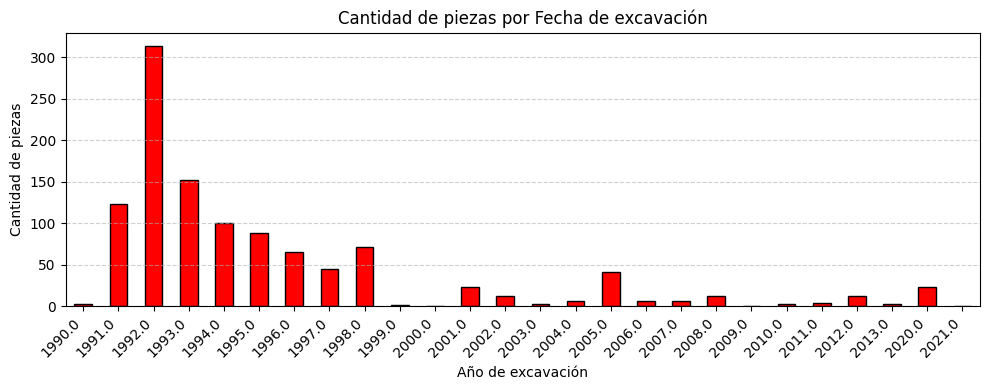

In [63]:
import matplotlib.pyplot as plt

# Crea la gráfica
plt.figure(figsize=(10, 4))
piezas_por_año.plot(kind='bar', color='red', edgecolor='black')

# Estilo de la gráfica
plt.title('Cantidad de piezas por Fecha de excavación')
plt.xlabel('Año de excavación')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

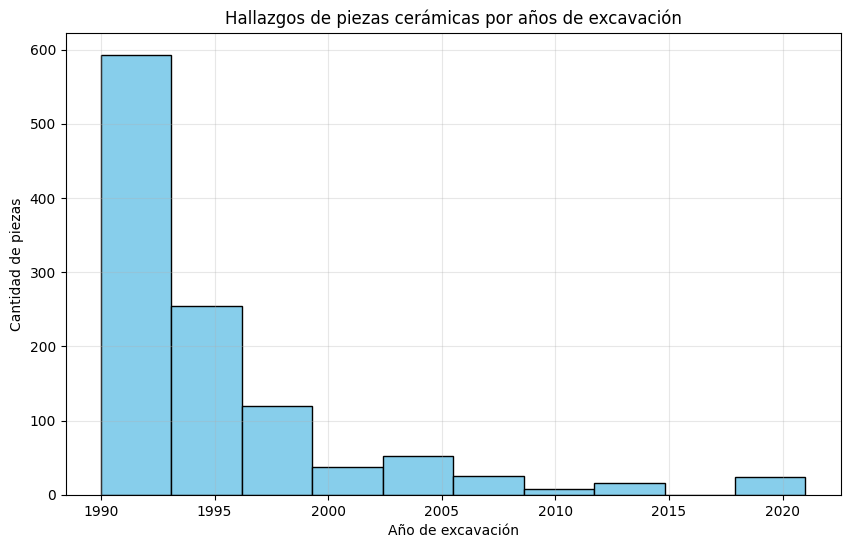

In [76]:
# Crear un histograma
# Histograma por hallazgos de piezas cerámicas según el año de excavación:

plt.figure(figsize=(10, 6))
plt.hist(df['Año de excavación'], bins=10, color='skyblue', edgecolor='black')
plt.title('Hallazgos de piezas cerámicas por años de excavación')
plt.xlabel('Año de excavación')
plt.ylabel('Cantidad de piezas')
plt.grid(True, alpha=0.3)
plt.savefig('release_year_hist.png')